# Instructions
You can use this notebook for **Task 1**

You can import the libraries that you need.
For instance:
```python
from sklearn.metrics import mean_squared_error
```

Please load the datasets that will be provided:
- Right-click and select upload from the left panel
- Select the files (*Japan_cities_rainfall.csv*, *rainfall_to_predict.csv*)


Below is the function to verify your final predictions based on the *rainfall_to_predict.csv* file.

**Please run it before starting**

#### Function to verify your prediction score
##### Root Mean Square Error

In order to verify the accuracy of you model, use the _verify_predictions_ function with your predictions results
```python
verify_predictions(output_result)

# returns {"result":RMSE_RESULT_VALUE,"type":"rmse"}
```


In [47]:
# Please do not modify
import requests
import json

def verify_predictions(y_pred):
    
    url = "https://q7wmplg8u6.execute-api.ap-northeast-1.amazonaws.com/dev"
    
    payload = {
        "submission": y_pred
    }
    response = requests.request("POST", url,data=json.dumps(payload),headers = {'content-type': 'application/json'})
    
    return response.text

#Start your task from below

# Code for the Rainfall prediction



---



In [48]:
# imports
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [50]:
# loading the datasets
df = pd.read_csv('/content/drive/MyDrive/wni/Japan_cities_rainfall.csv')
df_to_predict = pd.read_csv('/content/drive/MyDrive/wni/rainfall_to_predict.csv')

##### Preview datasets

In [51]:
df.head()

,date_time,place,longitude,latitude,rainfall
0,20200918_080000,Naha,127.686667,26.206667,0.0
1,20200918_080000,Fukuoka,130.375000,33.581667,0.0
2,20200918_080000,Sendai,140.896667,38.261667,0.0
3,20200918_080000,Osaka,135.518333,34.681667,0.0
4,20200918_080000,Nigata,139.018333,37.893333,3.0


In [52]:
df.tail()

,date_time,place,longitude,latitude,rainfall
19971,20201127_090000,Sendai,140.896667,38.261667,0.0
19972,20201127_090000,Tokyo,139.750000,35.691667,0.0
19973,20201127_090000,Osaka,135.518333,34.681667,0.0
19974,20201127_090000,Fukuoka,130.375000,33.581667,0.0
19975,20201127_090000,Nigata,139.018333,37.893333,0.0


In [53]:
df_to_predict.count()

date_time    202
place        202
longitude    202
latitude     202
dtype: int64

In [54]:
df['place'].unique()

array([' Naha', ' Fukuoka', ' Sendai', ' Osaka', ' Nigata', ' Tokyo'],
      dtype=object)

In [55]:
#a seperate column for easy analysis
df_to_predict['rainfall']=np.nan

In [56]:
df_to_predict.head()

,date_time,place,longitude,latitude,rainfall
0,20200919_013000,Naha,127.686667,26.206667,NaN
1,20200919_223000,Nigata,139.018333,37.893333,NaN
2,20200919_233000,Sendai,140.896667,38.261667,NaN
3,20200920_030000,Fukuoka,130.375000,33.581667,NaN
4,20200920_130000,Naha,127.686667,26.206667,NaN


In [57]:
#converted the given date time to a standard format
def date_time(a):
  return str(a[:4]+"-"+a[4:6]+"-"+a[6:8]+" "+a[9:11]+":"+a[11:13])

In [58]:
#encoding cities with numbers
city_mapping = {" Naha": 1, " Fukuoka": 2, " Sendai": 3, " Osaka": 4, " Nigata": 5, " Tokyo": 6}
datasets=[df,df_to_predict]
cols=['dt','city','rainfall']
for data in datasets:
  data['city']=data['place'].map(city_mapping)
  data['dt']=data['date_time'].apply(date_time)
  data.drop(['place','longitude','latitude','date_time'],axis=1,inplace=True)
  data=data[cols]

In [59]:
#merged the training and testing set
frames=[df,df_to_predict]
data=pd.concat(frames)

In [60]:
#reindexing
data = data.reindex(columns=['dt','city','rainfall'])

In [61]:
#standard format to convert it to regular time series data
data['dt'] =  pd.to_datetime(data['dt'], format='%Y-%m-%d %H:%M')

In [62]:
data=data.sort_values(by='dt',ascending=True)

In [63]:
data

,dt,city,rainfall
0,2020-09-18 08:00:00,1,0.0
1,2020-09-18 08:00:00,2,0.0
2,2020-09-18 08:00:00,3,0.0
3,2020-09-18 08:00:00,4,0.0
4,2020-09-18 08:00:00,5,3.0
...,...,...,...
19972,2020-11-27 09:00:00,6,0.0
19973,2020-11-27 09:00:00,4,0.0
19974,2020-11-27 09:00:00,2,0.0
19975,2020-11-27 09:00:00,5,0.0


In [64]:

city_1=data[data['city']==1]

In [65]:
city_1

,dt,city,rainfall
0,2020-09-18 08:00:00,1,0.0
7,2020-09-18 08:30:00,1,0.0
14,2020-09-18 09:00:00,1,0.0
23,2020-09-18 09:30:00,1,0.0
29,2020-09-18 10:00:00,1,0.0
...,...,...,...
19950,2020-11-27 07:00:00,1,0.0
19957,2020-11-27 07:30:00,1,0.0
19959,2020-11-27 08:00:00,1,0.0
19968,2020-11-27 08:30:00,1,0.0


In [66]:
#replacing the NaN values with average of the previous 3 data using method of Rolling Mean
city_1 = city_1.assign(RollingMean=city_1.rainfall.fillna(city_1.rainfall.rolling(3,min_periods=1,).mean()))

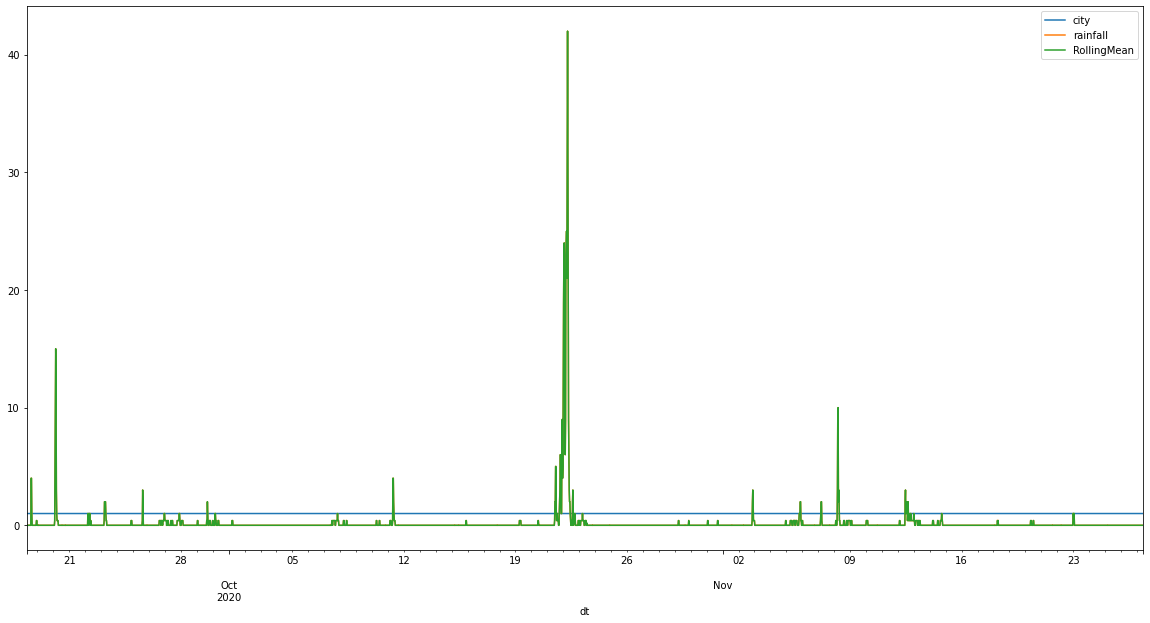

In [67]:
city_1.plot(x='dt',figsize=(20, 10))

In [68]:
place={}
for i in range(1,7):
  place[i]=data[data['city']==i]
  place[i]=place[i].assign(RollingMean=place[i].rainfall.fillna(place[i].rainfall.rolling(3,min_periods=1,).mean()))

In [69]:
def predictions(a):
  return place[a[1]][place[a[1]]['dt']==a[0]]['RollingMean'].values[0]


In [70]:
df_to_predict['pred']=df_to_predict[['dt','city']].apply(predictions,axis=1)

In [71]:
predictions=df_to_predict['pred']
predictions

0      0.000000e+00
1      0.000000e+00
2      0.000000e+00
3      0.000000e+00
4      5.551115e-17
           ...     
197    0.000000e+00
198    0.000000e+00
199    2.775558e-16
200    0.000000e+00
201    0.000000e+00
Name: pred, Length: 202, dtype: float64

In [72]:
#Json accepts only list values
predictions=predictions.tolist()

In [73]:
result_rmse = verify_predictions(predictions)
print(result_rmse)

{"result":0.6390354736711078,"type":"rmse"}



##### Analysis